<font size=6><b> 딥러닝 기초(회귀)

* ref : https://www.tensorflow.org/?hl=ko
* ref : https://keras.io/ko/
* ref : https://keras.io/api/layers/core_layers/dense/

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

# Data Load

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [3]:
df = pd.read_csv('../ML/datasets/housing.csv', header=None, delimiter=r"\s+", names=column_names)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
from sklearn.model_selection import train_test_split
y = df['MEDV']
X = df.drop(['MEDV'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=1234)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 13), (51, 13), (455,), (51,))

# ML

In [5]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

model = Ridge(alpha=1.0, random_state=1234)
model.fit(X_train, y_train)
pred = model.predict(X_test)
rmse = mean_squared_error(y_test, pred, squared=False)
print(f"RMSE : {rmse:.4f}")

RMSE : 4.0695


# DL

## seed 고정

In [6]:
import tensorflow as tf
tf.random.set_seed(1234)
np.random.seed(1234)

In [7]:
from keras.models import Sequential
from keras.layers import Dense

In [8]:
X_train.columns, len(X_train.columns)

(Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
        'PTRATIO', 'B', 'LSTAT'],
       dtype='object'),
 13)

## <font color=red><b>Activation Function</b></font>
* ref : https://keras.io/api/layers/activations/
    * ReLu : 기울기소실(역전파 시 w 사라짐) 문제 완화
    * Sigmoid
    * Softmax
    * Hyperbolic Tangent
    
<pre>
    from tensorflow.keras import activations as act
    act.relu

    from keras import activations as act
    act.relu()
    act.sigmoid()
    act.softmax()
    act.tanh()

##  <font color=red><b>Losses (loss function)</b></font> 
* ref : https://keras.io/api/losses/
   * <b>Aliases</b>
    * bce = BCE = binary_crossentropy  
    * mse = MSE = mean_squared_error  
    * mae = MAE = mean_absolute_error  
    * mape = MAPE = mean_absolute_percentage_error  
    * msle = MSLE = mean_squared_logarithmic_error  
    * kld = KLD = kullback_leibler_divergence = kl_divergence  
    * logcosh = log_cosh  
    * huber_loss = huber
* Probabilistic losses
    * <font color=blue>binary_cross_entropy(원본값 둘중하나) : 0,1
    * <font color=blue>sparse_categorical_cross_entropy(원본값 n중 하나) : 0 ~ 9         
    * <font color=blue>categorical_cross_entropy(원핫인코딩) : 100000000 ~ 000000001  </font> -- get-dummies needed
* Regression losses
    * <font color=blue>mse,mae,rmse</blue>
* Hinge losses for "maximum-margin" classification
    * Hinge class ...

<pre>        
    from keras import losses as loss  
    loss.binary_crossentropy()  
    loss.categorical_crossentropy()  
    loss.sparse_categorical_crossentropy()  
    loss.cosine_similarity()  
    loss.mean_squared_error()  
    <font color=blue><b>
    loss.MSE  -- V  
    loss.mse  -- v  
    loss.mean_squared_error() --f  
    
        model.compile(loss="mean_squared_error")  
        model.compile(loss="mse")  
        model.compile(loss="MSE")  
        model.compile(loss=tf.keras.losses.mean_squared_error())</b></font>
    
</pre>

## <font color=red><b>Optimizer</b></font>
*  https://keras.io/api/optimizers/
    * Gradient Descent
    * Statistic Gradient Descent
    * Momentum
    * AdaGrade
    * Adam
    * RmsProp
    
<pre>
    from keras import optimizers as opt  
    opt.Adam()  
    opt.Adadelta()  
    opt.Adagrad()  
    opt.Optimizer()  
    opt.RMSprop()  
    opt.SGD()  
    opt.TFOptimizer()
    
    from keras.optimizers import Adam  
    a = Adam(learning_rate=0.001, ... , name="Adam")  
    
    <font color=blue><b>
    model.compile(optimizer='adam')
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001)) 


## <font color=red><b>metrics</b></font>
* ref : https://keras.io/api/metrics/)
    * Probabilistic metrics : Crossentropy ...
    * Regression metrics : MeanSquaredError ... 
    * Hinge metrics for "maximum-margin" classification<br><br>
    * Accuracy metrics : Accuracy ...
    * Classification metrics based on True/False : AUC, Precision ...
    * Image segmentation metrics
    
<pre>
    from keras.metrics import Accuracy
    acc = Accuracy(name="accuracy", dtype=None)

    from keras.metrics import BinaryCrossentropy
    cr = BinaryCrossentropy(name="binary_crossentropy", ...)
    
    <font color=blue><b>
    model.compile(metrics=[keras.metrics.Accuracy()])
    model.compile(metrics=['accuracy'])

## 사용자 정의 metrics

In [9]:
import tensorflow as tf
from keras.optimizers import Adam  
from keras.losses import MeanSquaredError

@tf.function
def my_mse_def(y_true, y_pred):
    return -1 * keras.losses.MSE(y_true, y_pred)

model = Sequential()
model.add(Dense(units=56, input_dim=len(X_train.columns), activation='relu'))
model.add(Dense(units=24 , activation='relu'))
model.add(Dense(units=26 , activation='relu'))
model.add(Dense(units=12 , activation='relu'))
model.add(Dense(units=8  , activation='relu'))
model.add(Dense(units=4  , activation='relu'))
model.add(Dense(units=1  ))

model.compile(loss=my_mse_def,
              optimizer=Adam(lr=0.001),
              metrics=  [tf.keras.losses.MeanSquaredError()]  
             )


* ref  : https://neptune.ai/blog/keras-metrics

In [10]:

# def recall(y_true, y_pred):
#     y_true = K.ones_like(y_true)
#     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#     all_positives = K.sum(K.round(K.clip(y_true, 0, 1)))

#     recall = true_positives / (all_positives + K.epsilon())
#     return recall

# def precision(y_true, y_pred):
#     y_true = K.ones_like(y_true)
#     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))

#     predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
#     precision = true_positives / (predicted_positives + K.epsilon())
#     return precision

# def f1_score(y_true, y_pred):
#     precision = precision_m(y_true, y_pred)
#     recall = recall_m(y_true, y_pred)
#     return 2*((precision*recall)/(precision+recall+K.epsilon()))


# model.compile(loss='mse',
#               optimizer=Adam(lr=0.001),
#               metrics= ['accuracy', f1_score]  #, precision, recall]  
#              )

# fit_hisroty = model.fit(X_train, y_train
#                         , validation_data=(X_test, y_test)
#                         , epochs=100
#                         , batch_size = 32
#                         , steps_per_epoch = 455/32
#                        )

## 모델 Sequential()
* from keras.models import Sequential
* from keras.layers import Dense

In [11]:
model = Sequential()
model.add(Dense(units=56, input_dim=len(X_train.columns), activation='relu'))
model.add(Dense(units=24 , activation='relu'))
model.add(Dense(units=26 , activation='relu'))
model.add(Dense(units=12 , activation='relu'))
model.add(Dense(units=8  , activation='relu'))
model.add(Dense(units=4  , activation='relu'))
model.add(Dense(units=1  ))  #-----------------회귀 : y^ = wx+b
model.compile(loss="mean_squared_error", optimizer="adam", metrics="mse") #----------l o m

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 56)                784       
                                                                 
 dense_8 (Dense)             (None, 24)                1368      
                                                                 
 dense_9 (Dense)             (None, 26)                650       
                                                                 
 dense_10 (Dense)            (None, 12)                324       
                                                                 
 dense_11 (Dense)            (None, 8)                 104       
                                                                 
 dense_12 (Dense)            (None, 4)                 36        
                                                                 
 dense_13 (Dense)            (None, 1)                

In [13]:
# from keras.applications import InceptionV3
# mo = InceptionV3()
# mo.summary()

### hidden layer 확인

In [14]:
model.layers[0].output

<KerasTensor: shape=(None, 56) dtype=float32 (created by layer 'dense_7')>

In [15]:
model.get_layer('dense_7').output

<KerasTensor: shape=(None, 56) dtype=float32 (created by layer 'dense_7')>

In [16]:
model.input

<KerasTensor: shape=(None, 13) dtype=float32 (created by layer 'dense_7_input')>

* ref : https://keras.io/api/models/model/
* ref : https://keras.io/ko/initializers/

### 배치정규화
* <font color=red>Xavier 배치 정규화</font>
    * kernel_initializer='glorot_normal'
    * keras.initializers.glorot_normal(seed=None)
    * stddev = 1 / sqrt(fan_in)
    * sigmoid <br><br>
* <font color=red>HE 배치 정규화</font>
    * kernel_initializer='he_normal'
    * keras.initializers.he_normal(seed=None)
    * stddev = sqrt(2 / fan_in)
    * relu
* model.add(Dense(units=10, input_dim=4, activation='relu', <font color=red>kernel_initializer='glorot_normal'</font>))     

In [17]:
# inputs  = keras.Input(shape=(3,))
# x       = tf.keras.layers.Dense(4, activation=tf.nn.relu)(inputs)
# outputs = keras.layers.Dense(5, activation=tf.nn.softmax)(x)
# model   = tf.keras.Model(inputs=inputs, outputs=outputs)

from keras import Model
hidden_layer1_model = Model(inputs=model.input, outputs=model.layers[0].output)
output = hidden_layer1_model(X_train.values)

# -4.96479869e-02  -->  -9.99999999e-02
# new_weight = [-9.99999999e-02, -1.31228065e+00,  1.99921787e-01,
#         -4.56847548e-01, -5.63214898e-01, -1.75537765e-01,
#         -5.14393985e-01,  9.51746013e-03, -8.53538454e-01,
#         -9.48194712e-02, -1.03328049e+00, -2.53696948e-01,
#          1.68627203e-01,  2.80268133e-01, -7.88949192e-01,
#         -6.96348369e-01, -8.22624981e-01,  2.62601018e-01,
#          1.22495711e-01,  1.49118334e-01, -2.28315070e-01,
#         -6.61183774e-01,  1.23996437e-01, -5.28111219e-01,
#          9.61591303e-02, -6.49019361e-01, -4.09550488e-01,
#          1.97757840e-01, -4.72919047e-01, -9.83721018e-01,
#         -6.78088129e-01, -1.39518529e-01,  1.25122607e-01,
#         -9.58911598e-01, -7.17370808e-01, -5.39645433e-01,
#         -1.56555402e+00,  2.88044035e-01,  2.30250537e-01,
#          9.26579773e-01, -2.65088588e-01,  2.56911099e-01,
#          1.12216711e-01, -7.41300210e-02, -7.68341005e-01,
#         -9.87456799e-01, -6.94400907e-01, -4.39792722e-01,
#          2.92690217e-01, -6.29654169e-01, -2.12101564e-01,
#          1.56603634e-01, -6.53494477e-01, -3.22431624e-02,
#         -1.04178464e+00, -8.02286148e-01]
# model.set_weights(new_weight)


print(f"input : {X_train[:1]}")
print(f"output : {output[:1]}")

print(f"hidden_layer1_model weight : {np.array(hidden_layer1_model.get_weights()[0]).shape}")
print(f"hidden_layer1_model weight : {hidden_layer1_model.get_weights()[:2]}")

input :         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE    DIS  RAD    TAX  \
304  0.05515  33.0   2.18     0  0.472  7.236  41.1  4.022    7  222.0   

     PTRATIO       B  LSTAT  
304     18.4  393.68   6.93  
output : [[  0.          64.03607    127.04916      0.53551507  57.880985
    0.           0.           0.         132.78442      0.
    0.           0.           0.           0.           0.
   75.90544      0.           0.          68.07633     76.16186
   59.07369      0.          68.21419      5.0779934    0.
   62.633904    74.01844     37.926353     0.          34.503197
   31.85741      0.           0.          16.423162     0.
    0.         137.93587      0.          81.5868      40.52063
    0.           0.          16.712366     0.          82.54103
    0.          15.605442    16.649632     0.           0.
   48.693226     4.7161665  140.27534      0.           0.
   48.61      ]]
hidden_layer1_model weight : (13, 56)
hidden_layer1_model weight : [array([[ 2.51

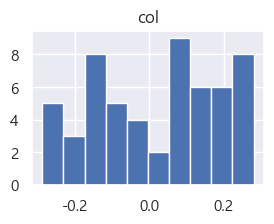

In [18]:
pd.DataFrame({"col":model.get_weights()[0][0]}).hist(figsize=(3,2))
plt.show()

11490434/11490434 [==============================] - 1s 0us/step


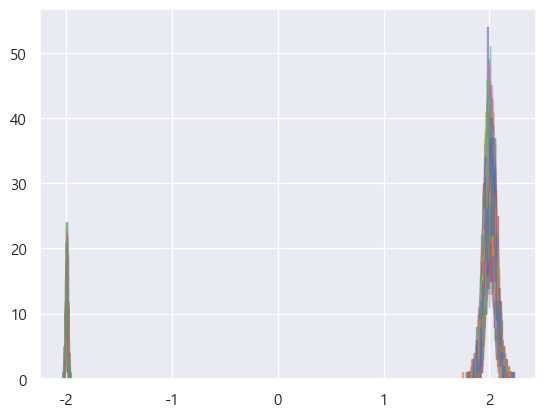

In [19]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

# tf.keras.initializers.RandomNormal 사용하기
initializer1 = tf.keras.initializers.RandomNormal(mean=2.0, stddev=0.05, seed=None)
initializer2 = tf.keras.initializers.RandomNormal(mean=-2.0, stddev=0.01, seed=None)

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu, use_bias=False, kernel_initializer=initializer1),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax, use_bias=False, kernel_initializer=initializer2)
])

weights = model.get_weights()
# print(weights)

plt.hist(weights[0], bins=100, alpha=0.7, histtype='step')
plt.hist(weights[1], bins=100, alpha=0.7, histtype='step')
plt.show()

# tf.keras.initializers.RandomNormal 사용하기
* mean=2.0  , stddev=0.05   ,  mean=-2.0, stddev=0.01
* mean=-0.05, stddev=0.05 ,  mean=-0.1, stddev=0.1

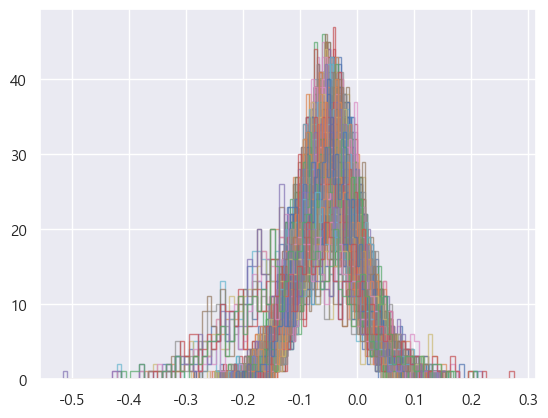

In [20]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

# tf.keras.initializers.RandomNormal 사용하기
initializer1 = tf.keras.initializers.RandomNormal(mean=-0.05, stddev=0.05, seed=None)
initializer2 = tf.keras.initializers.RandomNormal(mean=-0.1, stddev=0.1, seed=None)

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu, use_bias=False, kernel_initializer=initializer1),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax, use_bias=False, kernel_initializer=initializer2)
])

weights = model.get_weights()
# print(weights)

plt.hist(weights[0], bins=100, alpha=0.7, histtype='step')
plt.hist(weights[1], bins=100, alpha=0.7, histtype='step')
plt.show()

In [21]:
model = Sequential()
model.add(Dense(units=56, input_dim=len(X_train.columns), activation='relu'
               , kernel_initializer='glorot_normal'  #--  Xavier:1/root(N)
               ))
model.add(Dense(units=24 , activation='relu'))
model.add(Dense(units=26 , activation='relu', kernel_initializer='glorot_normal'))
model.add(Dense(units=12 , activation='relu'))
model.add(Dense(units=8  , activation='relu'))
model.add(Dense(units=4  , activation='relu'))
model.add(Dense(units=1  ))  #-----------------회귀 : y^ = wx+b
model.compile(loss="mean_squared_error", optimizer="adam", metrics="mse")


### 모델/가중치 저장&불러오기
* fit()이후에 가중치가 모두 보정된 상태의 모델을 저장해서 배포!!!
* save() : 모델구조 + 보정된weights
    * 바로사용 가능
    * 저장 용량이 크다
* save_weights() : 보정된weights
    * 저장 용량이 적다
    * 모델 구조를 알아야 사용 가능

#### 모델
* model.save("aaa.h5")
* re_model = load_model("aaa.h5")

In [22]:
y = df['MEDV']
X = df.drop(['MEDV'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=1234)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 13), (51, 13), (455,), (51,))

In [23]:
model = Sequential()
model.add(Dense(units=56, input_dim=len(X_train.columns), activation='relu'
               , kernel_initializer='glorot_normal'  #--  Xavier:1/root(N)
               ))
model.add(Dense(units=24 , activation='relu'))
model.add(Dense(units=26 , activation='relu', kernel_initializer='glorot_normal'))
model.add(Dense(units=12 , activation='relu'))
model.add(Dense(units=8  , activation='relu'))
model.add(Dense(units=4  , activation='relu'))
model.add(Dense(units=1  ))  #-----------------회귀 : y^ = wx+b
model.compile(loss="mean_squared_error", optimizer="adam", metrics="mse")

In [24]:
from keras.models import load_model
model.fit(X_train, y_train)
model.evaluate(X_test, y_test) 
model.save("./lec02_my_model.h5")
model.save_weights("./lec02_my_weight")

2/2 [==============================] - 0s 3ms/step - loss: 236.2238 - mse: 236.2238


In [25]:
re_model = load_model("./lec02_my_model.h5")
re_model.evaluate(X_test, y_test) 

2/2 [==============================] - 0s 3ms/step - loss: 236.2238 - mse: 236.2238


[236.22384643554688, 236.22384643554688]

#### 가중치
* model.save_weights("my_weight")
* re_weights = load_weights("my_weight")
* model.set_weights(re_weights)

In [26]:
model = Sequential()
model.add(Dense(units=56, input_dim=len(X_train.columns), activation='relu'
               , kernel_initializer='glorot_normal'  #--  Xavier:1/root(N)
               ))
model.add(Dense(units=24 , activation='relu'))
model.add(Dense(units=26 , activation='relu', kernel_initializer='glorot_normal'))
model.add(Dense(units=12 , activation='relu'))
model.add(Dense(units=8  , activation='relu'))
model.add(Dense(units=4  , activation='relu'))
model.add(Dense(units=1  ))  #-----------------회귀 : y^ = wx+b
model.compile(loss="mean_squared_error", optimizer="adam", metrics="mse")

model.load_weights("./lec02_my_weight")
model.evaluate(X_test, y_test) 

2/2 [==============================] - 0s 3ms/step - loss: 236.2238 - mse: 236.2238


[236.22384643554688, 236.22384643554688]

## fit()
* 모델학습 : 총 문항 : 100문항 <br><br>
<pre>
Model.fit(
    <font color=blue><b>x=None,              : 문제지 100  
    y=None,              : 답안지 100    
    batch_size=20,       : 역전파횟수 5 (100문제를 20문제씩 풀고 답을 맞춘 후 w 보정)   
    epochs=3,            : 학습 박복 횟수 300  
    steps_per_epoch=None,: 샘플수/배치수 = 100문항/20배치 (최대한 답안맞출수 있는 횟수)  </b></font>
    initial_epoch=0,     : 반복 시작 번호  
      
    <font color=blue><b>validation_split=0.2 : 100문항 중 20문항은 테스트에 사용  
    validation_data=(X_test, y_test),: train_test_split에서 자른 test데이터셋 직접 넣기  
    validation_batch_size=None,  (=batch_size)  
    validation_steps=None,       (=steps_per_epoch)</b></font>  
    validation_freq=1,  
      
    verbose="auto",        
    callbacks=None,      : ***  
    shuffle=True,  
    
    class_weight=None,  
    sample_weight=None,  
    max_queue_size=10,  
    workers=1,  
    use_multiprocessing=False,  
)

In [27]:
y = df['MEDV']
X = df.drop(['MEDV'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=1234)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 13), (51, 13), (455,), (51,))

### train만 넣은 경우 
    * batch_size=50(약 9회 : w 보정 횟수가 적었다)
    * epochs=10 (반복 학습이 다소 적은 경우)

* X, y 통째로 넣고  train 점수만 본 경우
* 오버피팅 확인 불가

In [28]:
model = load_model("./lec02_my_model.h5")
model.fit(x=X,y=y, batch_size=50,epochs=10,steps_per_epoch=455/50)
print(model.evaluate(X_test, y_test) )

Epoch 1/10
9/9 [==============================] - 0s 2ms/step - loss: 235.9869 - mse: 235.9869
Epoch 2/10
9/9 [==============================] - 0s 2ms/step - loss: 105.7705 - mse: 105.7705
Epoch 3/10
9/9 [==============================] - 0s 2ms/step - loss: 115.1541 - mse: 115.1541
Epoch 4/10
9/9 [==============================] - 0s 1ms/step - loss: 84.6714 - mse: 84.6714
Epoch 5/10
9/9 [==============================] - 0s 1ms/step - loss: 73.1798 - mse: 73.1798
Epoch 6/10
9/9 [==============================] - 0s 1ms/step - loss: 68.7034 - mse: 68.7034
Epoch 7/10
9/9 [==============================] - 0s 1ms/step - loss: 67.5815 - mse: 67.5815
Epoch 8/10
9/9 [==============================] - 0s 1ms/step - loss: 66.9875 - mse: 66.9875
Epoch 9/10
9/9 [==============================] - 0s 3ms/step - loss: 66.5647 - mse: 66.5647
Epoch 10/10
2/2 [==============================] - 0s 3ms/step - loss: 42.6895 - mse: 42.6895
[42.689476013183594, 42.689476013183594]


### epochs=10, batch_size=50
    * batch_size=50(약 9회 : w 보정 횟수가 적었다)
    * epochs=10 (반복 학습이 다소 적은 경우)

* X, y 통째로 넣고  test_size = 0.2로 잡고 test 데이터로 검증
* <b>오버피팅 확인 결과 : 어느정도 일반화 학습</b>

In [29]:
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=1234)
# model.fit(x=X_train,y=y_train
#           ,validation_data=(X_test, y_test) 
#           , batch_size=50,epochs=10,steps_per_epoch=455/50)

train_test_split(X,y , test_size = 0.2, random_state=1234)
model = load_model("./lec02_my_model.h5")
model.fit(x=X,y=y,validation_split=0.2 , batch_size=50,epochs=10,steps_per_epoch=455/50)
print(model.evaluate(X_test, y_test) )

Epoch 1/10
9/9 [==============================] - 1s 16ms/step - loss: 288.2088 - mse: 288.2088 - val_loss: 24.2380 - val_mse: 24.2380
Epoch 2/10
9/9 [==============================] - 0s 4ms/step - loss: 132.0676 - mse: 132.0676 - val_loss: 147.2233 - val_mse: 147.2233
Epoch 3/10
9/9 [==============================] - 0s 4ms/step - loss: 108.2878 - mse: 108.2878 - val_loss: 132.3068 - val_mse: 132.3068
Epoch 4/10
9/9 [==============================] - 0s 4ms/step - loss: 96.2762 - mse: 96.2762 - val_loss: 44.6981 - val_mse: 44.6981
Epoch 5/10
9/9 [==============================] - 0s 5ms/step - loss: 92.7666 - mse: 92.7666 - val_loss: 40.0452 - val_mse: 40.0452
Epoch 6/10
9/9 [==============================] - 0s 5ms/step - loss: 79.1430 - mse: 79.1430 - val_loss: 57.4838 - val_mse: 57.4838
Epoch 7/10
9/9 [==============================] - 0s 4ms/step - loss: 83.7379 - mse: 83.7379 - val_loss: 46.7257 - val_mse: 46.7257
Epoch 8/10
9/9 [==============================] - 0s 4ms/step - l

### epochs=50, batch_size=5
    * batch_size=5(약 90회 : w 보정 횟수가 10배 늘었다)
    * epochs=50 (반복 학습이 5배 늘었다)

* 오버피팅 발생 우려
    * batch_size=5 (50보다 작다 == 자주 답안을 체크한다 == w보정이 빈번히 일어난다 == loss작아진다)
    * epochs=50 (10보다 크다 == 1문제를 5배 더 학습했다)

In [30]:
model = load_model("./lec02_my_model.h5")
model.fit(x=X,y=y,validation_split=0.2,batch_size=5, epochs=50,steps_per_epoch=455/5)
print(model.evaluate(X_test, y_test) )


Epoch 1/50
91/91 [==============================] - 1s 2ms/step - loss: 117.8195 - mse: 117.8195 - val_loss: 47.0796 - val_mse: 47.0796
Epoch 2/50
91/91 [==============================] - 0s 1ms/step - loss: 86.5490 - mse: 86.5490 - val_loss: 30.7655 - val_mse: 30.7655
Epoch 3/50
91/91 [==============================] - 0s 1ms/step - loss: 65.6374 - mse: 65.6374 - val_loss: 19.3533 - val_mse: 19.3533
Epoch 4/50
91/91 [==============================] - 0s 2ms/step - loss: 69.9539 - mse: 69.9539 - val_loss: 22.7375 - val_mse: 22.7375
Epoch 5/50
91/91 [==============================] - 0s 1ms/step - loss: 67.5770 - mse: 67.5770 - val_loss: 28.3066 - val_mse: 28.3066
Epoch 6/50
91/91 [==============================] - 0s 1ms/step - loss: 64.7574 - mse: 64.7574 - val_loss: 30.5260 - val_mse: 30.5260
Epoch 7/50
91/91 [==============================] - 0s 1ms/step - loss: 59.8882 - mse: 59.8882 - val_loss: 33.7662 - val_mse: 33.7662
Epoch 8/50
91/91 [==============================] - 0s 2ms/s

### epochs=50, batch_size=5, learning_rate 
    * batch_size=5(약 90회 : w 보정 횟수가 10배 늘었다)
    * epochs=50 (반복 학습이 5배 늘었다)
    * learning_rate(0.001) 기본
    * learning_rate(0.1) : 발산 loss가 매우 커졌다
    * learning_rate(0.00001) : loss가 0에 수렴하지 못한다epochs=50, batch_size=5

In [31]:
from keras.optimizers import Adam  # learning_rate=0.001

model = Sequential()
model.add(Dense(units=56, input_dim=len(X_train.columns), activation='relu'
               , kernel_initializer='glorot_normal'  #--  Xavier:1/root(N)
               ))
model.add(Dense(units=24 , activation='relu'))
model.add(Dense(units=26 , activation='relu', kernel_initializer='glorot_normal'))
model.add(Dense(units=12 , activation='relu'))
model.add(Dense(units=8  , activation='relu'))
model.add(Dense(units=4  , activation='relu'))
model.add(Dense(units=1  ))  #-----------------회귀 : y^ = wx+b
#model.compile(loss="mean_squared_error", optimizer="adam", metrics="mse")
model.compile(loss="mean_squared_error", optimizer=Adam(learning_rate=0.00001), metrics="mse") #----------l o m
model.fit(x=X,y=y,validation_split=0.2,epochs=50,batch_size=5, steps_per_epoch=455/5)
print(model.evaluate(X_test, y_test) )

Epoch 1/50
91/91 [==============================] - 1s 3ms/step - loss: 935.5209 - mse: 935.5209 - val_loss: 648.8657 - val_mse: 648.8657
Epoch 2/50
91/91 [==============================] - 0s 1ms/step - loss: 885.7291 - mse: 885.7291 - val_loss: 599.5490 - val_mse: 599.5490
Epoch 3/50
91/91 [==============================] - 0s 2ms/step - loss: 842.3201 - mse: 842.3201 - val_loss: 554.2037 - val_mse: 554.2037
Epoch 4/50
91/91 [==============================] - 0s 1ms/step - loss: 774.5032 - mse: 774.5032 - val_loss: 523.5602 - val_mse: 523.5602
Epoch 5/50
91/91 [==============================] - 0s 1ms/step - loss: 767.5654 - mse: 767.5654 - val_loss: 499.8272 - val_mse: 499.8272
Epoch 6/50
91/91 [==============================] - 0s 1ms/step - loss: 749.4671 - mse: 749.4671 - val_loss: 486.5082 - val_mse: 486.5082
Epoch 7/50
91/91 [==============================] - 0s 2ms/step - loss: 741.2922 - mse: 741.2922 - val_loss: 476.4836 - val_mse: 476.4836
Epoch 8/50
91/91 [================

## evaluate()

In [32]:
model.evaluate(X_test, y_test) 
# batch_size=None,
# steps=None,

2/2 [==============================] - 0s 3ms/step - loss: 266.8429 - mse: 266.8429


[266.8428955078125, 266.8428955078125]

## predict()

In [33]:
# yhat = model.predict(test_csv)